## Importer les librairies

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
path= '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
data= pd.read_csv(path)

In [4]:
data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [5]:
# Trouver les lignes avec des valeurs manquantes
missing_data = data[data.isnull().any(axis=1)]

# Afficher les lignes avec des valeurs manquantes
print(missing_data)

                     ID             Datetime  Sensor1_PM2.5  Sensor2_PM2.5  \
103     ID_UL9WZBMCZ441  2022-01-12 10:43:23          15.98           9.38   
104     ID_R4X8Q5NOZ5B9  2022-01-19 14:26:38          28.87          22.87   
124     ID_JHU4A57PSE6B  2021-10-19 02:05:22            NaN            NaN   
148     ID_ZS45U91YVMV4  2021-11-24 13:18:42          35.15          43.62   
169     ID_E5Y4OY335FBI  2021-10-21 13:26:12            NaN            NaN   
...                 ...                  ...            ...            ...   
296840  ID_LG87ML1I6F2W  2021-12-21 20:36:41          28.10          33.80   
296938  ID_VJEDDJ3XHWRF  2021-10-18 20:29:24            NaN            NaN   
296976  ID_VQUAT21ZCCTS  2021-10-21 08:55:29            NaN            NaN   
297047  ID_052VULG8W5RX  2021-12-21 20:11:37          32.70          29.50   
297083  ID_6IJJY3AQQ3NV  2021-10-30 19:59:45          48.67          38.60   

        Temperature  Relative_Humidity  Offset_fault  
103     

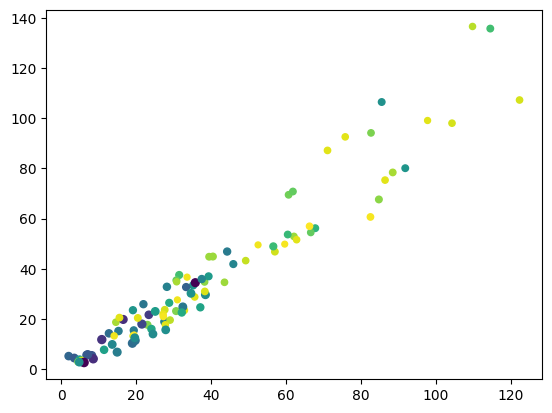

In [6]:
plt.scatter(data[data['Offset_fault']==0].iloc[:50, 2], data[data['Offset_fault']==0].iloc[:50, 3], data[data['Offset_fault']==0].iloc[:50, 4], c=data[data['Offset_fault']==0].iloc[:50, 5])
plt.scatter(data[data['Offset_fault']==1].iloc[:50, 2], data[data['Offset_fault']==1].iloc[:50, 3], data[data['Offset_fault']==1].iloc[:50, 4], c=data[data['Offset_fault']==1].iloc[:50, 5])

plt.show()

<ipython-input-7-07f24b0d94e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


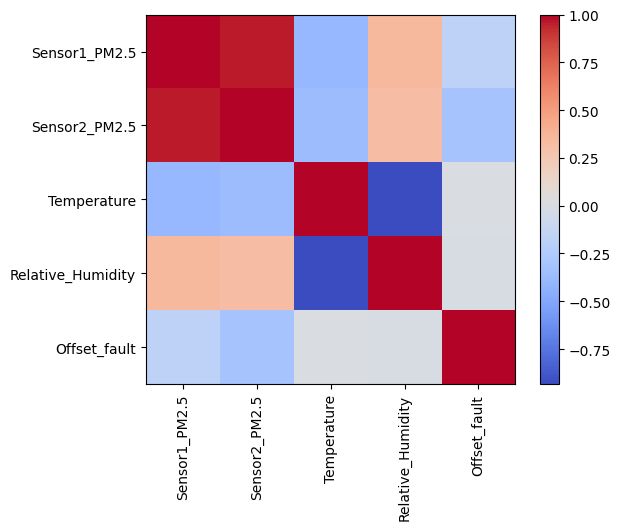

In [7]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

## Charger le fichier par morceaux

In [8]:
chunk_size = 10000
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
data_chunks = pd.read_csv(file_path, chunksize=chunk_size)


## Définir une fonction pour remplacer les outliers par les moyennes respectives des colonnes

In [9]:

def replace_outliers_with_mean(column):
    z_scores = stats.zscore(column)
    threshold = 3
    outlier_indices = (z_scores > threshold) | (z_scores < -threshold)
    column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
    return column


## Liste pour stocker les chunks après nettoyage

In [10]:
cleaned_data = []


## Itérer sur les chunks et nettoyer les valeurs manquantes pour chaque colonne

In [11]:
for chunk in data_chunks:
    # Détecter les valeurs manquantes pour chaque chunk
    missing_values = chunk.isnull().sum()
    print(missing_values)

    # Nettoyer les valeurs manquantes pour toutes les colonnes
    chunk['Sensor1_PM2.5'].fillna(chunk['Sensor1_PM2.5'].mean(), inplace=True)
    chunk['Sensor2_PM2.5'].fillna(chunk['Sensor2_PM2.5'].mean(), inplace=True)
    chunk['Temperature'].fillna(chunk['Temperature'].mean(), inplace=True)
    chunk['Relative_Humidity'].fillna(chunk['Relative_Humidity'].mean(), inplace=True)


    # Détecter les valeurs aberrantes pour chaque colonne
    for column in chunk.columns:
        if chunk[column].dtype != 'object':  # Assurez-vous que la colonne n'est pas de type 'object'
            chunk[column] = replace_outliers_with_mean(chunk[column])


    # Ajouter le chunk nettoyé à la liste
    cleaned_data.append(chunk)


ID                     0
Datetime               0
Sensor1_PM2.5        127
Sensor2_PM2.5        127
Temperature          114
Relative_Humidity    114
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        112
Sensor2_PM2.5        112
Temperature          144
Relative_Humidity    144
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        125
Sensor2_PM2.5        125
Temperature          132
Relative_Humidity    132
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        109
Sensor2_PM2.5        109
Temperature          114
Relative_Humidity    114
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        129
Sensor2_PM2.5        129
Temperature          112
Relative_Humidity    112
Offset_fault           0
dtype: int64


<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[ou

ID                     0
Datetime               0
Sensor1_PM2.5        127
Sensor2_PM2.5        127
Temperature          116
Relative_Humidity    116
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        110
Sensor2_PM2.5        110
Temperature          115
Relative_Humidity    115
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        111
Sensor2_PM2.5        111
Temperature          112
Relative_Humidity    112
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        136
Sensor2_PM2.5        136
Temperature          121
Relative_Humidity    121
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        120
Sensor2_PM2.5        120
Temperature          102
Relative_Humidity    102
Offset_fault           0
dtype: int64


<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[ou

ID                     0
Datetime               0
Sensor1_PM2.5        109
Sensor2_PM2.5        109
Temperature          119
Relative_Humidity    119
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        123
Sensor2_PM2.5        123
Temperature          125
Relative_Humidity    125
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        121
Sensor2_PM2.5        121
Temperature          129
Relative_Humidity    129
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        152
Sensor2_PM2.5        152
Temperature          114
Relative_Humidity    114
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        119
Sensor2_PM2.5        119
Temperature          114
Relative_Humidity    114
Offset_fault           0
dtype: int64


<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[ou

ID                     0
Datetime               0
Sensor1_PM2.5        114
Sensor2_PM2.5        114
Temperature          117
Relative_Humidity    117
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        111
Sensor2_PM2.5        111
Temperature          129
Relative_Humidity    129
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        144
Sensor2_PM2.5        144
Temperature          124
Relative_Humidity    124
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        124
Sensor2_PM2.5        124
Temperature          120
Relative_Humidity    120
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        128
Sensor2_PM2.5        128
Temperature          114
Relative_Humidity    114
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM

<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[ou

ID                     0
Datetime               0
Sensor1_PM2.5        116
Sensor2_PM2.5        116
Temperature          111
Relative_Humidity    111
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        111
Sensor2_PM2.5        111
Temperature          110
Relative_Humidity    110
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        122
Sensor2_PM2.5        122
Temperature          140
Relative_Humidity    140
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        132
Sensor2_PM2.5        132
Temperature          113
Relative_Humidity    113
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        116
Sensor2_PM2.5        116
Temperature          130
Relative_Humidity    130
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM

<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[ou

ID                     0
Datetime               0
Sensor1_PM2.5        111
Sensor2_PM2.5        111
Temperature          100
Relative_Humidity    100
Offset_fault           0
dtype: int64
ID                     0
Datetime               0
Sensor1_PM2.5        126
Sensor2_PM2.5        126
Temperature          117
Relative_Humidity    117
Offset_fault           0
dtype: int64
ID                    0
Datetime              0
Sensor1_PM2.5        87
Sensor2_PM2.5        87
Temperature          87
Relative_Humidity    87
Offset_fault          0
dtype: int64


<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outlier_indices] = column.mean()  # Remplacer les outliers par la moyenne de la colonne
<ipython-input-9-18ea32b65ced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[ou

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Concaténer tous les chunks nettoyés en un seul DataFrame

In [12]:
final_data = pd.concat(cleaned_data)


## Enregistrer le DataFrame nettoyé dans un nouveau fichier CSV


In [13]:
final_data.to_csv('/content/drive/MyDrive/Colab Notebooks/CleanDataSet.csv', index=False)

## Importer les donnees

In [14]:
path= '/content/drive/MyDrive/Colab Notebooks/CleanDataSet.csv'
data= pd.read_csv(path)

In [15]:
data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177.000000,297177.000000,297177.000000,297177.000000,297177.000000
mean,39.040272,36.239959,23.311029,78.804406,0.371072
std,22.716803,22.167688,3.805623,14.430155,0.483092
min,-9.450000,-9.700000,16.700000,34.000000,0.000000
25%,22.650000,19.700000,20.400000,68.000000,0.000000
50%,36.770000,34.020000,22.000000,83.000000,0.000000
75%,48.280000,46.330000,26.200000,91.000000,1.000000
max,136.770000,134.320000,34.900000,99.000000,1.000000


In [16]:
data.shape

(297177, 7)

In [17]:
# Prendre un échantillon aléatoire de 1/10 des données
data_sample = data.sample(frac=0.1, random_state=42)  # Modifier 0.1 pour obtenir la fraction désirée

In [18]:
X= data_sample.drop(['ID','Datetime','Offset_fault'], axis = 1)
X.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
176368,99.65,77.38,18.4,82.0
215993,8.98,10.63,25.9,68.0
279678,48.93,43.10,21.3,68.0
64443,34.80,25.37,19.6,97.0
225430,37.90,44.15,21.3,88.0


In [19]:
Y = data_sample['Offset_fault']
Y.head()

176368    1
215993    0
279678    1
64443     1
225430    0
Name: Offset_fault, dtype: int64

## Separer les donnees en donnees d'entrainement et de test

In [20]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((23774, 4), (23774,), (5944, 4), (5944,))

## MODELE REGRESSION LOGISTIQUE

## Importer le librairie

In [104]:
from sklearn.linear_model import LogisticRegression

## Instancier le modele

In [105]:
lr_model = LogisticRegression()

## Entrainer le modele

In [106]:
lr_model.fit(x_train, y_train)

LogisticRegression()

## Prediction

In [107]:
y_test_pred = lr_model.predict(x_test)

In [108]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0])

In [109]:
y_train_pred = lr_model.predict(x_train)

In [110]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluation (Accuracy et Matrix de confusion)

`- Pour les tests`

In [111]:
rl_accuracy = accuracy_score(y_test,y_test_pred )

In [112]:
rl_accuracy

0.8755047106325706

In [113]:
confusion_matrix(y_test, y_test_pred)

array([[3354,  324],
       [ 416, 1850]])

- Pour les trains

In [114]:
accuracy_score(y_train,y_train_pred )

0.8704467064860772

In [115]:
confusion_matrix(y_train, y_train_pred)

array([[13626,  1347],
       [ 1733,  7068]])

## MODELE KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn_model = KNeighborsClassifier()

In [118]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [119]:
y_test_pred = knn_model.predict(x_test)

In [120]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0])

In [121]:
y_train_pred = knn_model.predict(x_train)

In [122]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluation (Accuracy et Matrix de confusion)

- Pour les tests

In [123]:
knn_accuracy = accuracy_score(y_test,y_test_pred )

In [124]:
knn_accuracy

0.925471063257066

In [125]:
confusion_matrix(y_test, y_test_pred)

array([[3477,  201],
       [ 242, 2024]])

- Pour les trains

In [126]:
accuracy_score(y_train,y_train_pred )

0.944098595103895

In [127]:
confusion_matrix(y_train, y_train_pred)

array([[14387,   586],
       [  743,  8058]])

##RANDOM FOREST

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf_model = RandomForestClassifier(n_estimators=100)

In [130]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [131]:
y_test_pred = rf_model.predict(x_test)

In [132]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0])

In [133]:
y_train_pred = rf_model.predict(x_train)

In [134]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluation (Accuracy et Matrix de confusion)

- Pour les tests

In [135]:
rf_accuracy = accuracy_score(y_test,y_test_pred )

In [136]:
rf_accuracy

0.9316958277254375

In [137]:
confusion_matrix(y_test, y_test_pred)

array([[3513,  165],
       [ 241, 2025]])

- Pour les trains

In [138]:
accuracy_score(y_train,y_train_pred )

0.9999579372423656

In [139]:
confusion_matrix(y_train, y_train_pred)

array([[14973,     0],
       [    1,  8800]])

## MODEL DECISION TREE

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt_model = DecisionTreeClassifier()

In [142]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [143]:
y_test_pred = dt_model.predict(x_test)

In [144]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0])

In [145]:
y_train_pred = dt_model.predict(x_train)

In [146]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluation (Accuracy et Matrix de confusion)

- Pour les tests

In [147]:
dt_accuracy = accuracy_score(y_test,y_test_pred )

In [148]:
dt_accuracy

0.8958613728129206

In [149]:
confusion_matrix(y_test, y_test_pred)

array([[3388,  290],
       [ 329, 1937]])

- Pour les trains

In [150]:
accuracy_score(y_train,y_train_pred )

0.9999579372423656

In [151]:
confusion_matrix(y_train, y_train_pred)

array([[14973,     0],
       [    1,  8800]])

## RESEAU DE NEURONES

In [152]:
from sklearn.neural_network import MLPClassifier

In [153]:
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)


In [154]:
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

In [155]:
y_test_pred = mlp_model.predict(x_test)

In [156]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0])

In [157]:
y_train_pred = mlp_model.predict(x_train)

In [158]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluation (Accuracy et Matrix de confusion)

- Pour les tests

In [159]:
rn_accuracy = accuracy_score(y_test,y_test_pred )

In [160]:
rn_accuracy

0.9205921938088829

In [161]:
confusion_matrix(y_test, y_test_pred)

array([[3484,  194],
       [ 278, 1988]])

- Pour les trains

In [162]:
accuracy_score(y_train,y_train_pred )

0.9210061411626146

In [163]:
confusion_matrix(y_train, y_train_pred)

array([[14174,   799],
       [ 1079,  7722]])

## MODELE SVM

In [164]:
from sklearn.svm import SVC

In [165]:
svc_model = SVC()

In [166]:
svc_model.fit(x_train, y_train)

SVC()

In [167]:
y_test_pred = svc_model.predict(x_test)

In [168]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 0])

In [169]:
y_train_pred = svc_model.predict(x_train)

In [170]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluation (Accuracy et Matrix de confusion)

- Pour les tests

In [171]:
svm_accuracy = accuracy_score(y_test,y_test_pred )

In [172]:
svm_accuracy

0.9216016150740243

In [173]:
confusion_matrix(y_test, y_test_pred)

array([[3464,  214],
       [ 252, 2014]])

- Pour les trains

In [174]:
accuracy_score(y_train,y_train_pred )

0.9191553798267015

In [175]:
confusion_matrix(y_train, y_train_pred)

array([[14079,   894],
       [ 1028,  7773]])

# Comparatives des évaluations

In [178]:
print("Compraison des différentes modèles :")
print(f"Accuracy Regression Logistique: {rl_accuracy}")
print(f"Accuracy KNN: {knn_accuracy}")
print(f"Accuracy Random Forest: {rf_accuracy}")
print(f"Accuracy Decision Tree: {dt_accuracy}")
print(f"Accuracy Resseau de Neurones: {rn_accuracy}")
print(f"Accuracy SVM: {svm_accuracy}")


Compraison des différentes modèles :
Accuracy Regression Logistique: 0.8755047106325706
Accuracy KNN: 0.925471063257066
Accuracy Random Forest: 0.9316958277254375
Accuracy Decision Tree: 0.8958613728129206
Accuracy Resseau de Neurones: 0.9205921938088829
Accuracy SVM: 0.9216016150740243


## Technique de hyperparameter

- Pour Regression Logistique

In [197]:
# Définir les hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [198]:
# Initialiser le modèle de régression logistique
logistic_reg = LogisticRegression(max_iter=10000)


In [199]:
# Recherche des meilleurs hyperparamètres avec validation croisée (5-fold)
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [200]:
rl_accuracy_final = grid_search.best_score_

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs hyperparamètres : {'C': 0.01, 'penalty': 'l2'}
Meilleure précision : 0.8696895458448406


- Pour KNN

In [184]:
# Définir les hyperparamètres à rechercher
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [185]:
# Initialiser le modèle KNN
knn = KNeighborsClassifier()

In [186]:
# Recherche des meilleurs hyperparamètres avec validation croisée (5-fold)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [188]:
knn_accuracy_final = grid_search.best_score_

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision :", knn_accuracy_final)


Meilleurs hyperparamètres : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Meilleure précision : 0.9253804267765879


- Pour Decision Tree

In [189]:
# Définir les hyperparamètres à rechercher
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [190]:
# Initialiser le modèle Decision Tree
decision_tree = DecisionTreeClassifier()

In [191]:
# Recherche des meilleurs hyperparamètres avec validation croisée (5-fold)
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [192]:
dt_accuracy_final = grid_search.best_score_

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision :", dt_accuracy_final)


Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Meilleure précision : 0.9023724644739921


- Pour Random Forest

In [201]:
# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [202]:
# Initialiser le modèle Random Forest
random_forest = RandomForestClassifier()

In [ ]:
# Recherche des meilleurs hyperparamètres avec validation croisée (5-fold)
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
rf_accuracy_final = grid_search.best_score_

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Meilleure précision : 0.9205916750912546


- Pour Reseau de neurones

In [ ]:
# Définir les hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
# Initialiser le modèle MLPClassifier (Réseau de neurones)
mlp = MLPClassifier()

In [ ]:
# Recherche des meilleurs hyperparamètres avec validation croisée (5-fold)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: ignored

In [ ]:
rn_accuracy_final = grid_search.best_score_

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Meilleure précision : 0.9236199958655803


- Pour SVM

In [ ]:
# Définir les hyperparamètres à rechercher
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}


In [ ]:
# Initialiser le modèle SVM
svm = SVC()

In [ ]:
# Recherche des meilleurs hyperparamètres avec validation croisée (5-fold)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=1)

In [ ]:
svm_accuracy_final = grid_search.best_score_

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs hyperparamètres : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Meilleure précision : 0.9069652227347771


In [196]:
print("Compraison des différentes modèles :")
print(f"Accuracy Regression Logistique: {rl_accuracy_final}")
print(f"Accuracy KNN: {knn_accuracy_final}")
#print(f"Accuracy Random Forest: {rf_accuracy_final}")
print(f"Accuracy Decision Tree: {dt_accuracy_final}")
#print(f"Accuracy Resseau de Neurones: {rn_accuracy_final}")
#print(f"Accuracy SVM: {svm_accuracy_final}")

Compraison des différentes modèles :
Accuracy Regression Logistique: 0.8696895458448406
Accuracy KNN: 0.9253804267765879
Accuracy Decision Tree: 0.9023724644739921
